In [1]:
import numpy as np
from matplotlib import pyplot
from PySDM_examples.Arabas_et_al_2015 import Settings, SpinUp
from PySDM_examples.Szumowski_et_al_1998 import Simulation

from PySDM import Formulae
from PySDM.backends import CPU
from PySDM.physics import si
from PySDM.products import SuperDropletCountPerGridbox

from atmos_cloud_sim_uj_utils import show_plot

rtol = 0.01

In [2]:
class DummyStorage:
    def __init__(self):
        self.profiles = []

    def init(*_):  # pylint: disable=no-method-argument,no-self-argument
        pass

    def save(
        self, data: np.ndarray, step: int, name: str
    ):  # pylint: disable=unused-argument
        pyplot.imshow(
            data.T, origin="lower", extent=(0, settings.grid[0], 0, settings.grid[1])
        )
        cbar = pyplot.colorbar()
        cbar.set_label("#SD / cell")

        pyplot.clim(0, 2 * settings.n_sd_per_gridbox)
        pyplot.title(
            f"adaptive: {settings.displacement_adaptive} {f'(rtol={rtol})' if rtol else ''}"
        )
        pyplot.xlabel("x/dx")
        pyplot.ylabel("z/dz")
        pyplot.xticks(np.arange(settings.grid[0] + 1)[::8], rotation=70)
        pyplot.yticks(np.arange(settings.grid[1] + 1)[::8])
        show_plot(f"fig_displacement_rtol={rtol}_step={step}.pdf")

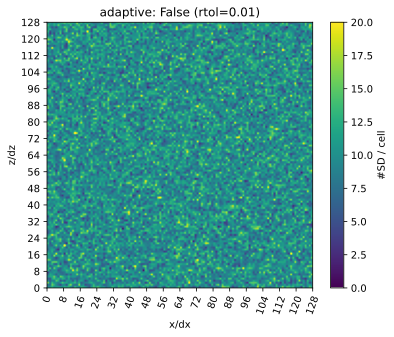

HTML(value="<a href='./fig_displacement_rtol=0.01_step=0.pdf' target='_blank'>./fig_displacement_rtol=0.01_ste…

0.0% (times since last print: cpu=5.7s wall=155.2s)


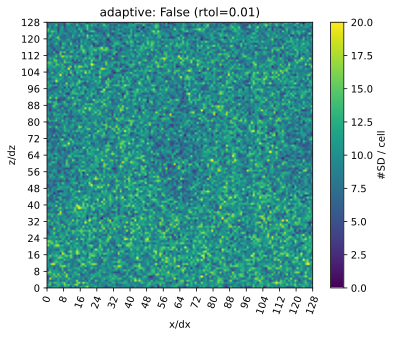

HTML(value="<a href='./fig_displacement_rtol=0.01_step=12500.pdf' target='_blank'>./fig_displacement_rtol=0.01…

12.5% (times since last print: cpu=822.9s wall=242.8s)


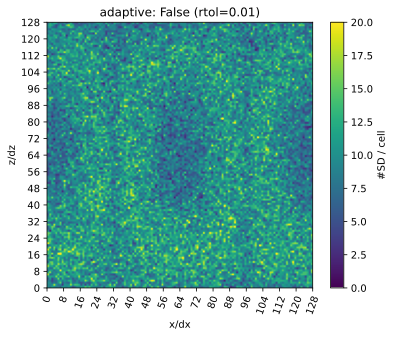

HTML(value="<a href='./fig_displacement_rtol=0.01_step=25000.pdf' target='_blank'>./fig_displacement_rtol=0.01…

25.0% (times since last print: cpu=930.6s wall=294.7s)


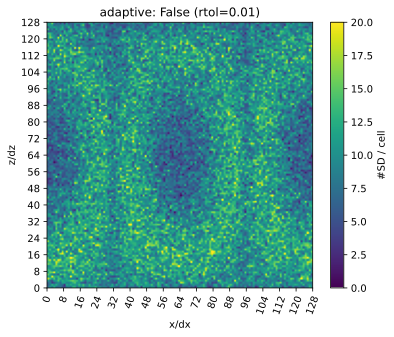

HTML(value="<a href='./fig_displacement_rtol=0.01_step=37500.pdf' target='_blank'>./fig_displacement_rtol=0.01…

37.5% (times since last print: cpu=949.8s wall=304.5s)


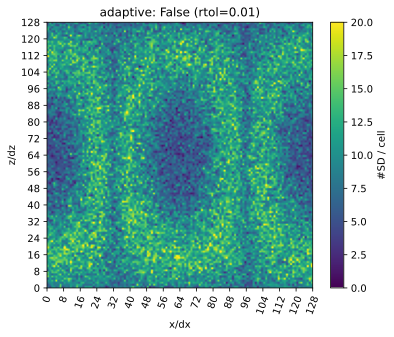

HTML(value="<a href='./fig_displacement_rtol=0.01_step=50000.pdf' target='_blank'>./fig_displacement_rtol=0.01…

50.0% (times since last print: cpu=863.5s wall=264.8s)


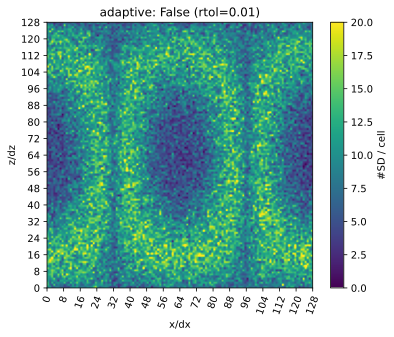

HTML(value="<a href='./fig_displacement_rtol=0.01_step=62500.pdf' target='_blank'>./fig_displacement_rtol=0.01…

62.5% (times since last print: cpu=824.4s wall=246.3s)


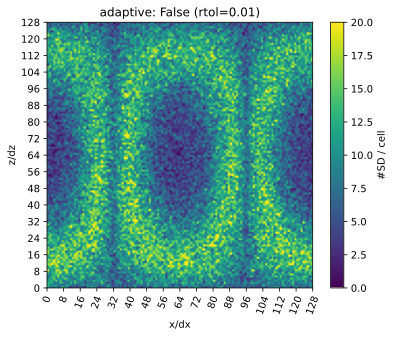

HTML(value="<a href='./fig_displacement_rtol=0.01_step=75000.pdf' target='_blank'>./fig_displacement_rtol=0.01…

75.0% (times since last print: cpu=788.1s wall=227.5s)


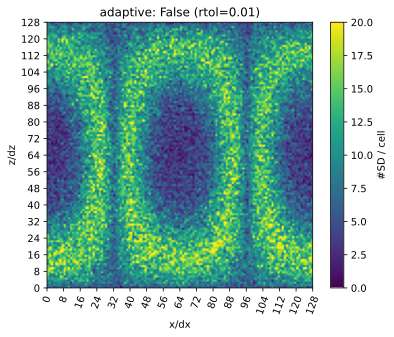

HTML(value="<a href='./fig_displacement_rtol=0.01_step=87500.pdf' target='_blank'>./fig_displacement_rtol=0.01…

87.5% (times since last print: cpu=790.2s wall=228.2s)


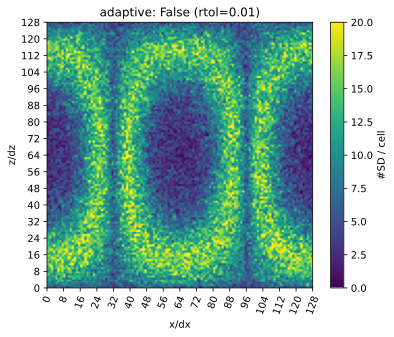

HTML(value="<a href='./fig_displacement_rtol=0.01_step=100000.pdf' target='_blank'>./fig_displacement_rtol=0.0…

100.0% (times since last print: cpu=792.2s wall=228.8s)


In [5]:
# Arrange
settings = Settings(formulae=Formulae(seed=666))
settings.dt = 0.1 * si.s
settings.grid = (128, 128)
settings.n_sd_per_gridbox = 10
settings.rhod_w_max = 10 * si.m / si.s * si.kg / si.m**3

settings.simulation_time = 10000 * si.s
settings.spin_up_time = settings.simulation_time
settings.output_interval = settings.simulation_time / 8
if rtol is not None:
    settings.displacement_adaptive = False
    settings.displacement_rtol = rtol
else:
    settings.displacement_adaptive = False
settings.processes["condensation"] = False

storage = DummyStorage()
simulation = Simulation(settings, storage, SpinUp=SpinUp, backend_class=CPU)
simulation.reinit(products=[SuperDropletCountPerGridbox()])

# Act
simulation.run()